In [3]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(grid=False)

# set figure size
plt.rcParams["figure.figsize"] = (10,8)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from prepare import get_germany, get_sales

### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [4]:
sales = get_sales()
sales.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,26.00,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,27.00,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,54.00,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,35.00,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


In [14]:
daily_sales = sales.resample('D').sum()
daily_sales = daily_sales[['sales_total']]
daily_sales

,sales_total
sale_date,
2013-01-01,73844.01
2013-01-02,73570.58
2013-01-03,78169.48
2013-01-04,84467.73
2013-01-05,87621.85
...,...
2017-12-27,109151.15
2017-12-28,117377.49
2017-12-29,126541.84


In [15]:
# Lets use 70/30 train test split %

train_size = .70
n = daily_sales.shape[0]
test_start_index = round(train_size * n)
test_start_index

1278

In [16]:
# create train and test dataframe

train = daily_sales[:test_start_index] # everything up (not including) to the test_start_index
test = daily_sales[test_start_index:]

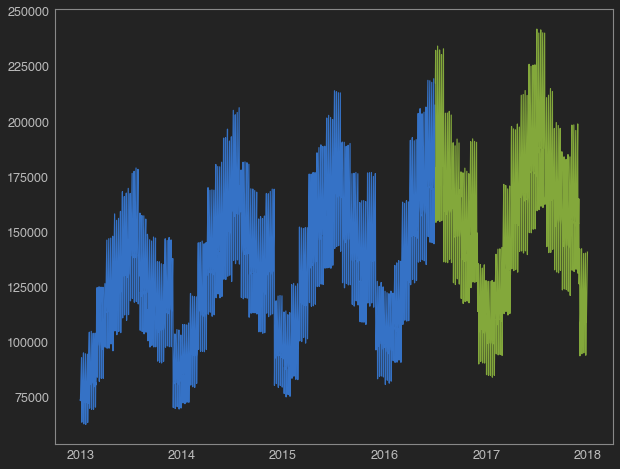

In [17]:
# lets plot train and test

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

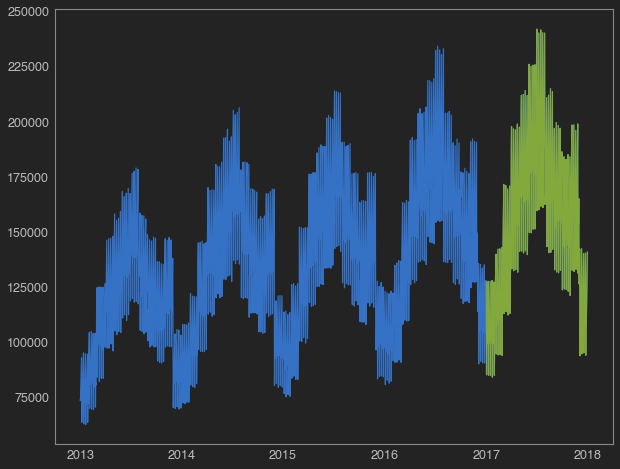

In [19]:
train = daily_sales[:'2017']
test = daily_sales['2017':'2018']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [21]:
train.head()

,sales_total
sale_date,
2013-01-01,73844.01
2013-01-02,73570.58
2013-01-03,78169.48
2013-01-04,84467.73
2013-01-05,87621.85


<AxesSubplot:ylabel='Frequency'>

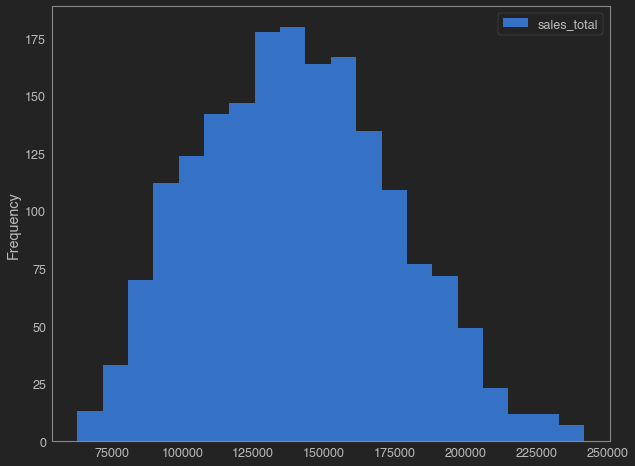

In [38]:
sales = train[['sales_total']]
sales.plot.hist(bins = 20)

In [25]:
train['month'] = train.index.month

In [26]:
train.head()

,sales_total,month
sale_date,,
2013-01-01,73844.01,1
2013-01-02,73570.58,1
2013-01-03,78169.48,1
2013-01-04,84467.73,1
2013-01-05,87621.85,1


<AxesSubplot:xlabel='month'>

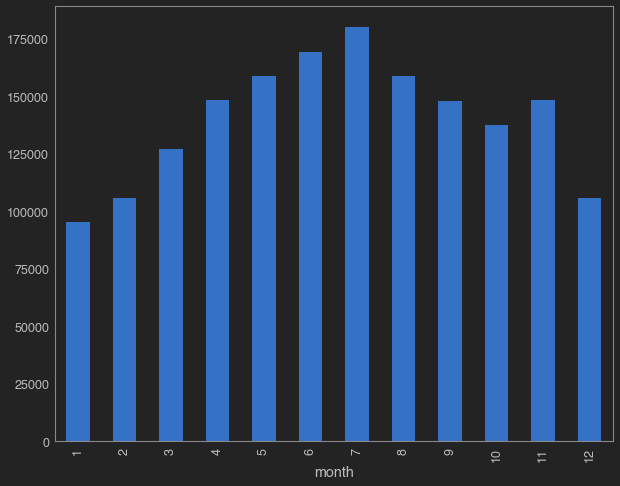

In [27]:
train.groupby('month').sales_total.mean().plot.bar()

In [28]:
train['weekday'] = train.index.day_name()
train.head()

,sales_total,month,weekday
sale_date,,,
2013-01-01,73844.01,1,Tuesday
2013-01-02,73570.58,1,Wednesday
2013-01-03,78169.48,1,Thursday
2013-01-04,84467.73,1,Friday
2013-01-05,87621.85,1,Saturday


<AxesSubplot:xlabel='weekday'>

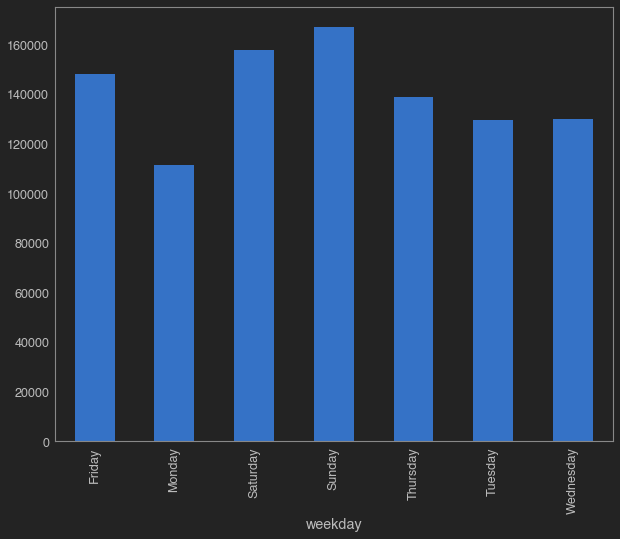

In [29]:
train.groupby('weekday').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

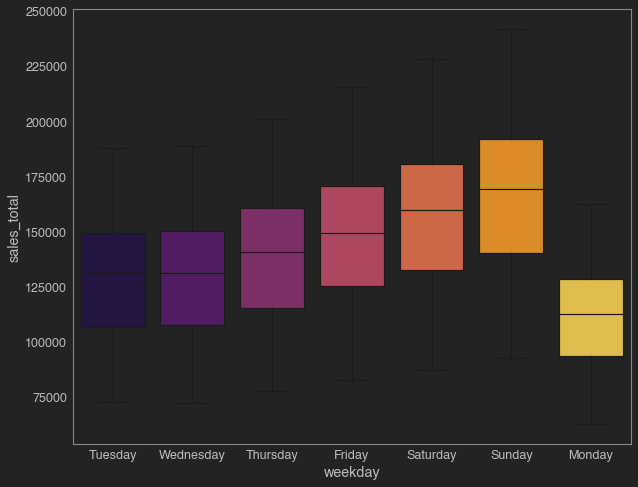

In [31]:
sns.boxplot(data = train, x='weekday', y='sales_total', palette='inferno')

<AxesSubplot:xlabel='month', ylabel='sales_total'>

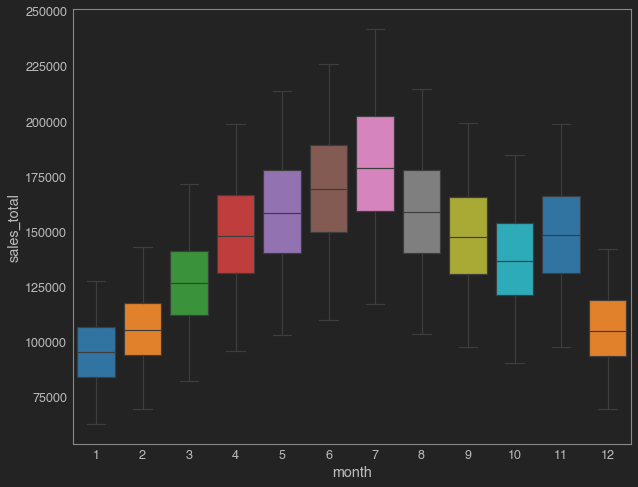

In [33]:
sns.boxplot(data=train, x='month', y='sales_total', palette='tab10')

<AxesSubplot:xlabel='sale_date'>

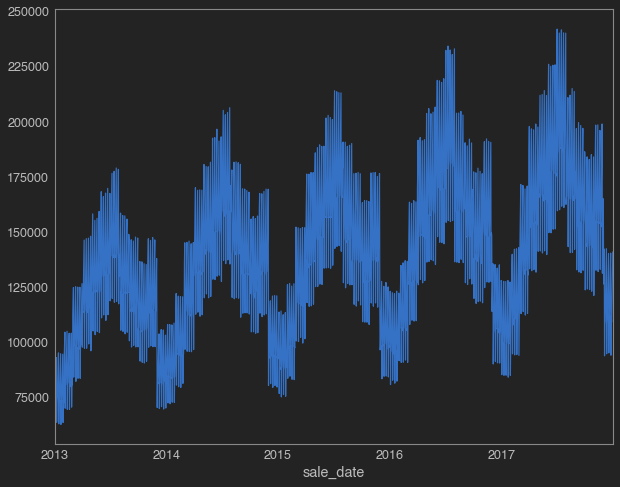

In [35]:
sales.plot()

sale_date
2013-01-01    73844.01
2013-01-02    73570.58
2013-01-03    78169.48
2013-01-04    84467.73
2013-01-05    87621.85
                ...   
2017-12-27   109151.15
2017-12-28   117377.49
2017-12-29   126541.84
2017-12-30   134903.07
2017-12-31   140905.74
Freq: D, Name: sales_total, Length: 1826, dtype: float64

<AxesSubplot:title={'center':'6 hour average'}, xlabel='sale_date'>

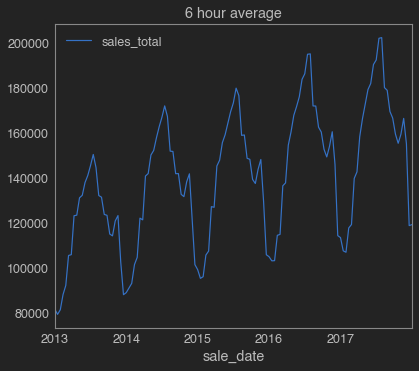

In [55]:
jtplot.style(grid=False)

sales.resample('2W').mean().plot(title='6 hour average')

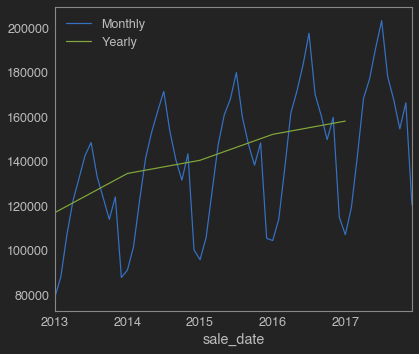

In [64]:
sales.resample('M').mean().sales_total.plot(label = 'Monthly')
sales.resample('Y').mean().sales_total.plot(label = 'Yearly')
plt.legend()

<AxesSubplot:xlabel='sale_date'>

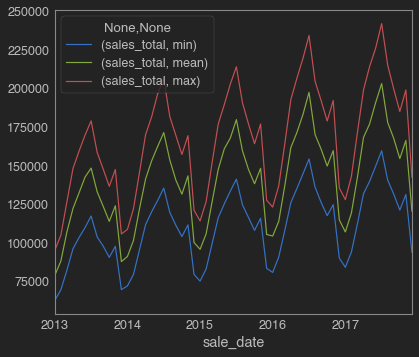

In [47]:
sales.resample('M').agg(['min','mean','max']).plot()

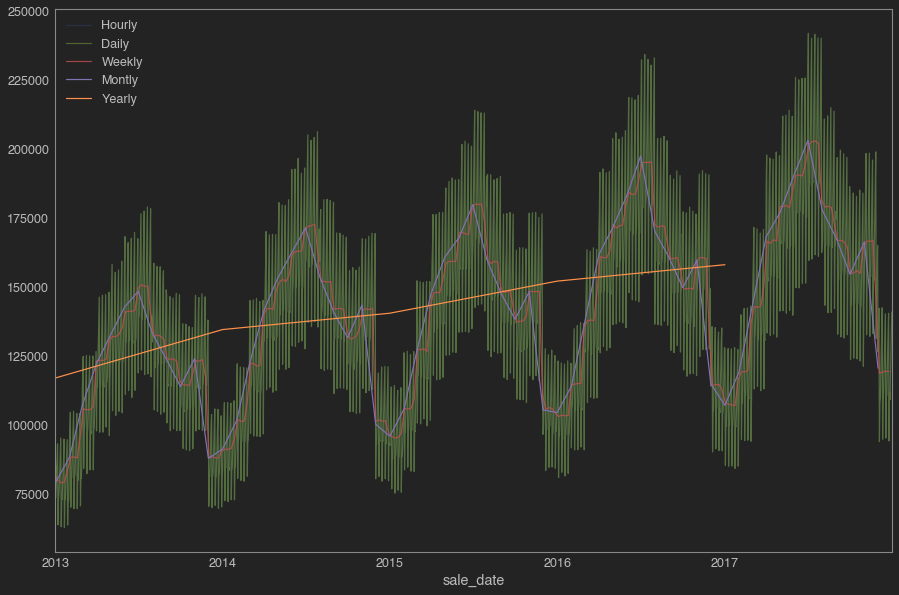

In [63]:
plt.figure(figsize=(15,10))
sales.sales_total.plot(alpha=.2, label='Hourly')
sales.resample('D').mean().sales_total.plot(alpha=.5, label='Daily')
sales.resample('W').mean().sales_total.plot(alpha=.8, label='Weekly')
sales.resample('M').mean().sales_total.plot(label='Montly')
sales.resample('Y').mean().sales_total.plot(label='Yearly')
plt.legend()

In [65]:
sales.resample('W').mean().diff()

,sales_total
sale_date,
2013-01-06,nan
2013-01-13,-1803.98
2013-01-20,-1017.24
2013-01-27,299.33
2013-02-03,4519.82
...,...
2017-12-03,-23146.29
2017-12-10,-25078.29
2017-12-17,524.88


<AxesSubplot:title={'center':'Average week-to-week change in total sales'}, xlabel='sale_date'>

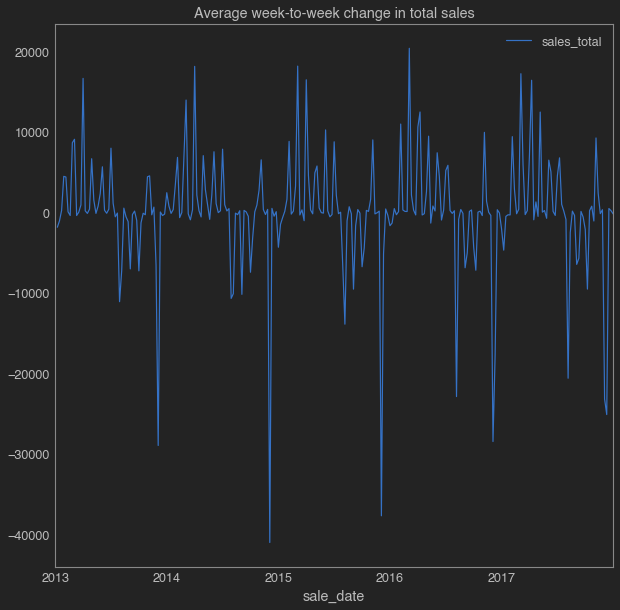

In [67]:
sales.resample('W').mean().diff().plot(title = 'Average week-to-week change in total sales', figsize = (10,10))

<AxesSubplot:title={'center':'Average month-to-month change in total sales'}, xlabel='sale_date'>

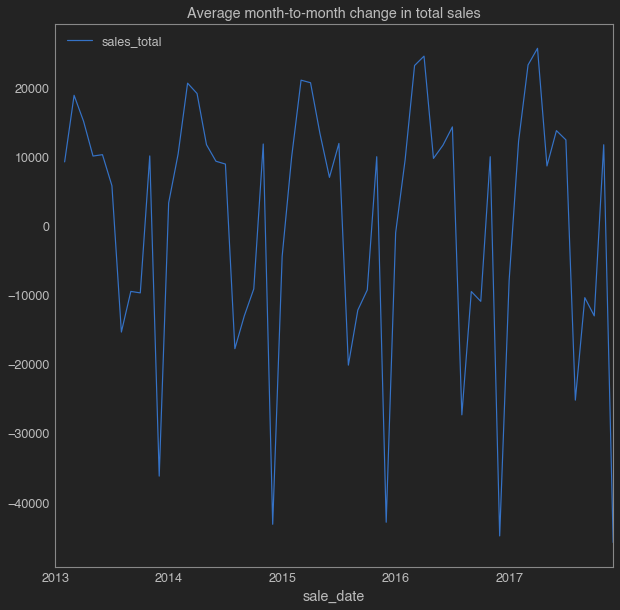

In [69]:
sales.resample('M').mean().diff().plot(title='Average month-to-month change in total sales', figsize = (10,10))

In [71]:
sales.groupby([sales.index.year, sales.index.month]).mean().unstack(0)

sales_total                                        
sale_date        2013      2014      2015      2016      2017
sale_date                                                    
1            78947.36  91205.40  95862.60 104450.26 107074.21
2            88205.93 101603.56 105794.92 113988.76 119320.98
3           107090.83 122244.50 126869.70 137183.70 142595.39
4           122230.04 141393.05 147573.80 161730.94 168275.27
5           132331.56 153133.77 160906.84 171493.19 176941.77
6           142630.64 162482.69 167925.39 183158.11 190717.97
7           148440.62 171424.55 179849.00 197476.64 203160.77
8           133091.69 153672.73 159717.84 170157.69 177968.21
9           123618.85 140675.21 147544.21 160666.96 167592.18
10          113934.03 131566.89 138286.08 149759.16 154585.09
11          124054.33 143410.52 148291.52 159766.28 166319.15
12           87876.85 100269.49 105443.10 114941.48 120542.75

<AxesSubplot:xlabel='sale_date'>

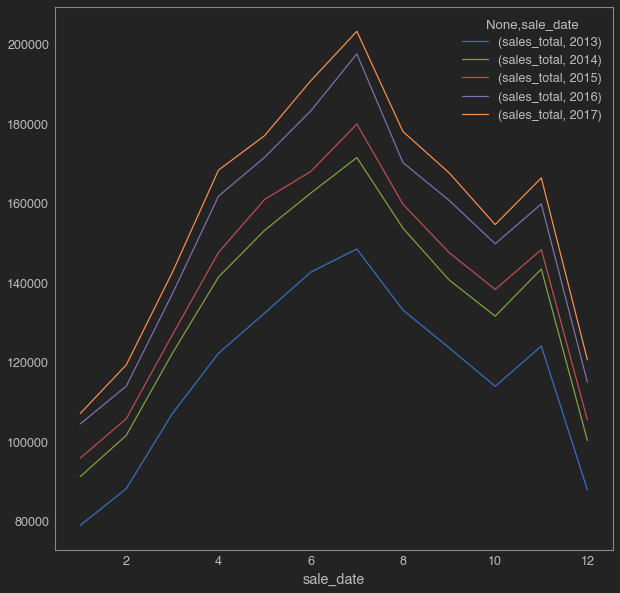

In [73]:
sales.groupby([sales.index.year, sales.index.month]).mean().unstack(0).plot(figsize=(10,10))

In [83]:
table = train.groupby([train.index.year, train.index.month]).mean().unstack()
table

sales_total                                                    \
sale_date          1         2         3         4         5         6    
sale_date                                                                 
2013         78947.36  88205.93 107090.83 122230.04 132331.56 142630.64   
2014         91205.40 101603.56 122244.50 141393.05 153133.77 162482.69   
2015         95862.60 105794.92 126869.70 147573.80 160906.84 167925.39   
2016        104450.26 113988.76 137183.70 161730.94 171493.19 183158.11   
2017        107074.21 119320.98 142595.39 168275.27 176941.77 190717.97   

                                                   ... month                 \
sale_date        7         8         9         10  ...    3  4  5  6  7  8    
sale_date                                          ...                        
2013      148440.62 133091.69 123618.85 113934.03  ...     3  4  5  6  7  8   
2014      171424.55 153672.73 140675.21 131566.89  ...     3  4  5  6  7  8   
2015      179849.00 159717.84 147544.21 138286.08  ...     3  4  5  6  7  8   
2016      197476.64 170157.69 160666.96 149759.16  ...     3  4  5  6  7  8   
2017      203160.77 177968.21 167592.18 154585.09  ...     3  4  5  6  7  8   

                          
sale_date 9   10  11  12  
sale_date                 
2013       9  10  11  12  
2014       9  10  11  12  
2015       9  10  11  12  
2016       9  10  11  12  
2017       9  10  11  12  

[5 rows x 24 columns]

In [75]:
# zip demo

x1 = [1,2,3]
x2 = ['a', 'b', 'c']

for i in zip(x1,x2):
    print(i)

(1, 'a')
(2, 'b')
(3, 'c')


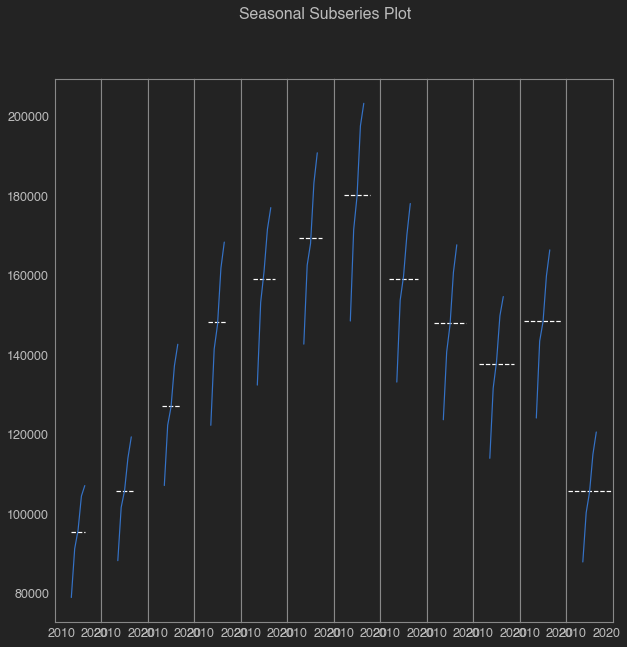

In [87]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, figsize = (10,10))
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [88]:
sales.shift(-1)

,sales_total
sale_date,
2013-01-01,73570.58
2013-01-02,78169.48
2013-01-03,84467.73
2013-01-04,87621.85
2013-01-05,93093.85
...,...
2017-12-27,117377.49
2017-12-28,126541.84
2017-12-29,134903.07


In [89]:
y = sales

Text(0.5, 1.0, 'Lag plot with lag = 1')

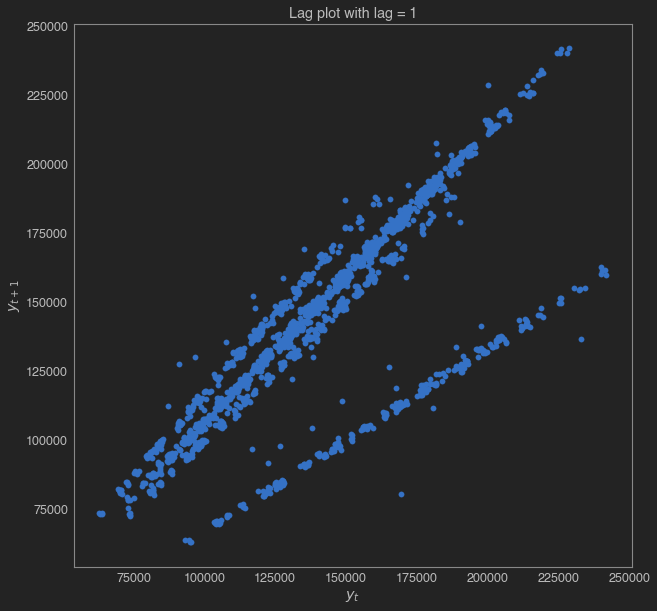

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

<AxesSubplot:xlabel='sales_total', ylabel='sales_next_day'>

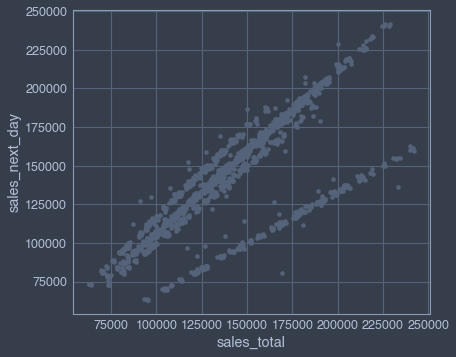

In [95]:
jtplot.style(theme='onedork')
daily = train.resample('D').mean()
daily['sales_next_day'] = daily.sales_total.shift(-1)
daily.plot.scatter(x='sales_total', y='sales_next_day')

,this_week,month,1_weeks_out
sale_date,,,
2013-01-06,81794.58,1.00,79990.60
2013-01-13,79990.60,1.00,78973.36
2013-01-20,78973.36,1.00,79272.69
2013-01-27,79272.69,1.00,83792.51
2013-02-03,83792.51,1.43,88227.80
...,...,...,...
2017-12-03,143735.02,11.43,118656.73
2017-12-10,118656.73,12.00,119181.61
2017-12-17,119181.61,12.00,119434.03


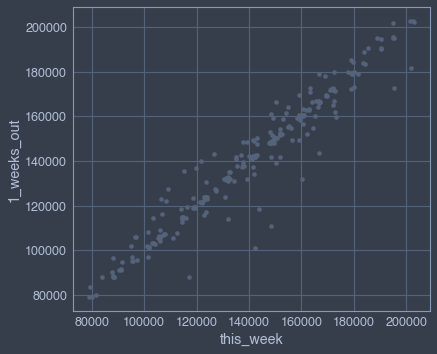

In [96]:
weekly = train.resample('W').mean()
weekly['1_weeks_out'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='1_weeks_out')
weekly

,this_week,month,12_weeks_out
sale_date,,,
2013-01-06,81794.58,1.00,106501.33
2013-01-13,79990.60,1.00,123193.64
2013-01-20,78973.36,1.00,123430.69
2013-01-27,79272.69,1.00,123345.04
2013-02-03,83792.51,1.43,123791.11
...,...,...,...
2017-12-03,143735.02,11.43,nan
2017-12-10,118656.73,12.00,nan
2017-12-17,119181.61,12.00,nan


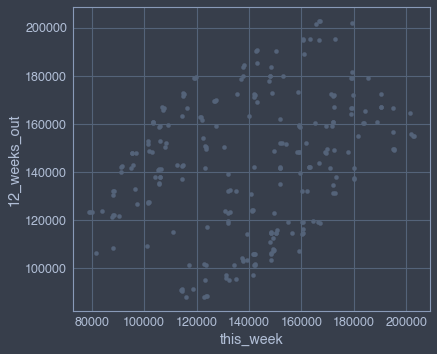

In [97]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,month,26_weeks_out
sale_date,,,
2013-01-06,81794.58,1.00,149604.70
2013-01-13,79990.60,1.00,150789.42
2013-01-20,78973.36,1.00,150282.57
2013-01-27,79272.69,1.00,150242.27
2013-02-03,83792.51,1.43,139188.13
...,...,...,...
2017-12-03,143735.02,11.43,nan
2017-12-10,118656.73,12.00,nan
2017-12-17,119181.61,12.00,nan


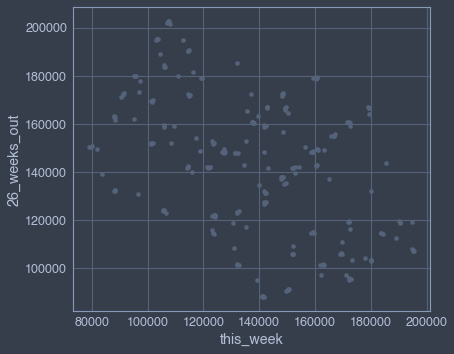

In [98]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

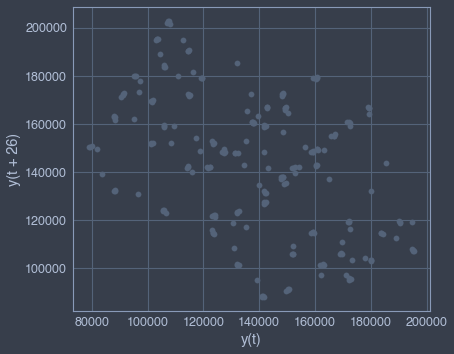

In [106]:
# easier way. Use pd.plotting.lag_plot(series, lag):
#'oceans16', 'grade3', 'chesterish', 'onedork', 'monokai', 'solarizedl', 'solarizedd'.
jtplot.style(theme='onedork')
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

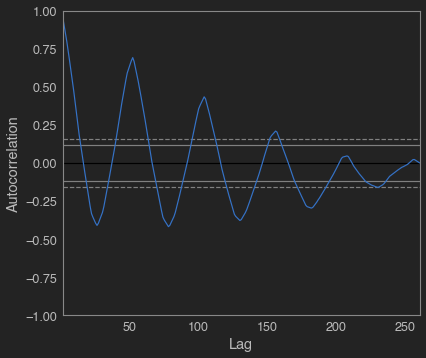

In [108]:
jtplot.style()
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [109]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [110]:
result.seasonal

sale_date
2013-01-06   -39546.99
2013-01-13   -41411.17
2013-01-20   -41813.22
2013-01-27   -42047.60
2013-02-03   -41060.05
                ...   
2017-12-03   -31662.65
2017-12-10   -37404.46
2017-12-17   -37627.48
2017-12-24   -37960.00
2017-12-31   -39546.99
Freq: W-SUN, Name: seasonal, Length: 261, dtype: float64

In [111]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,81794.58,nan,-39546.99,nan
2013-01-13,79990.60,nan,-41411.17,nan
2013-01-20,78973.36,nan,-41813.22,nan
2013-01-27,79272.69,nan,-42047.60,nan
2013-02-03,83792.51,nan,-41060.05,nan


<AxesSubplot:xlabel='sale_date'>

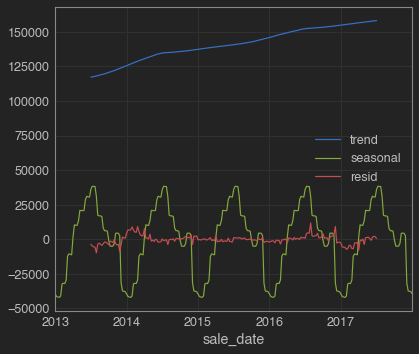

In [112]:
decomposition.iloc[:, 1:].plot()

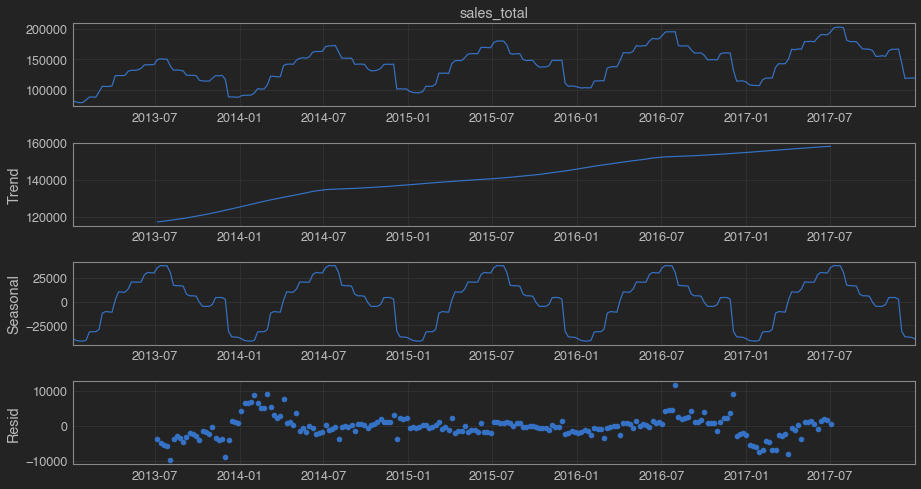

In [118]:
# the value returned from seasonal_decompose can itself be plotted:
plt.rc('figure', figsize=(13, 7))
result.plot()
None

In [119]:
train = train.resample('D').mean()
train.head()

,sales_total,month
sale_date,,
2013-01-01,73844.01,1
2013-01-02,73570.58,1
2013-01-03,78169.48,1
2013-01-04,84467.73,1
2013-01-05,87621.85,1


In [120]:
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 4, labels=['low', 'med_low', 'med_high', 'high'])
train.groupby('sales_bin').sales_total.mean()

sales_bin
low         97332.40
med_low    127136.30
med_high   151482.71
high       185841.33
Name: sales_total, dtype: float64

In [121]:
train.head()

,sales_total,month,sales_bin
sale_date,,,
2013-01-01,73844.01,1,low
2013-01-02,73570.58,1,low
2013-01-03,78169.48,1,low
2013-01-04,84467.73,1,low
2013-01-05,87621.85,1,low


Text(0, 0.5, '% of days in the month')

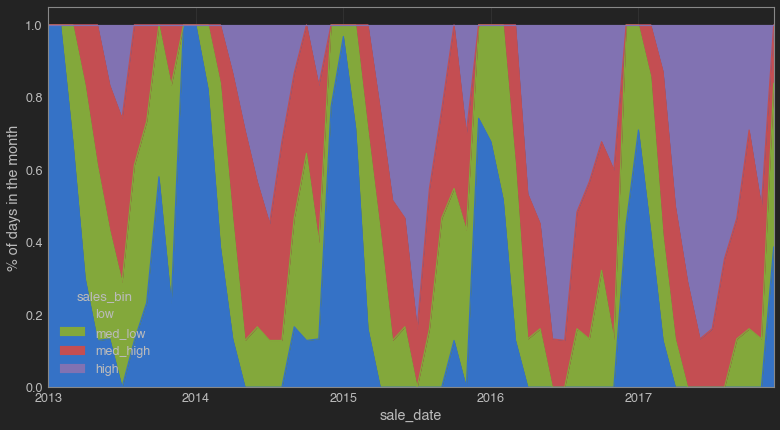

In [122]:
(train.groupby('sales_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
 .apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

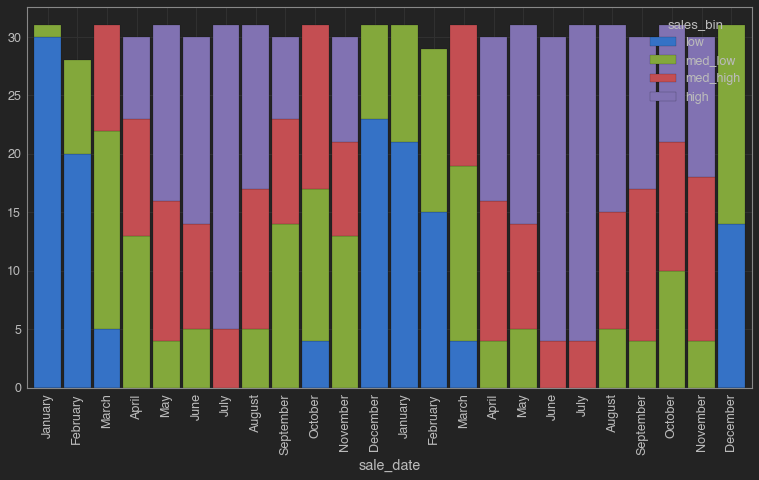

In [123]:
ax = (train['2015':'2016']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

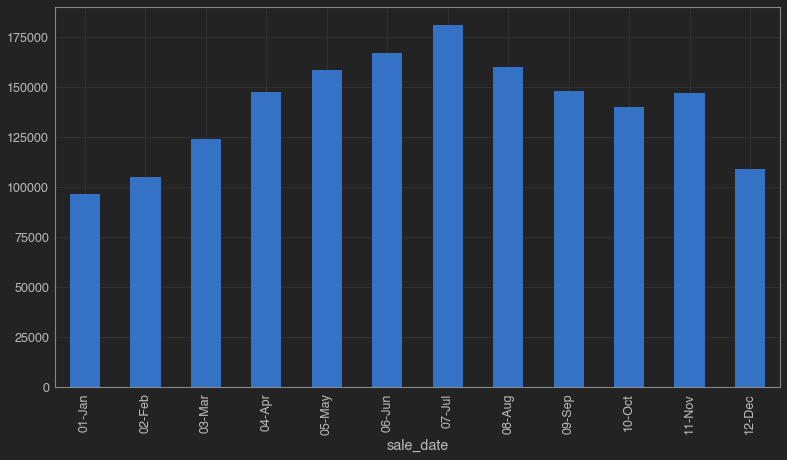

In [124]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()

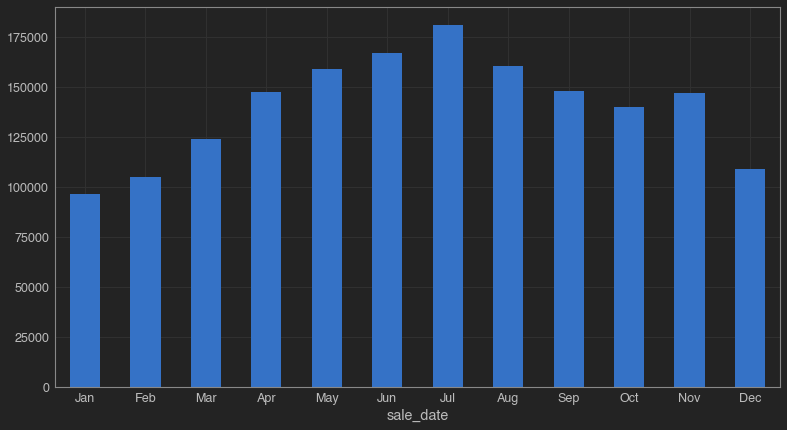

In [125]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);

<AxesSubplot:xlabel='sale_date'>

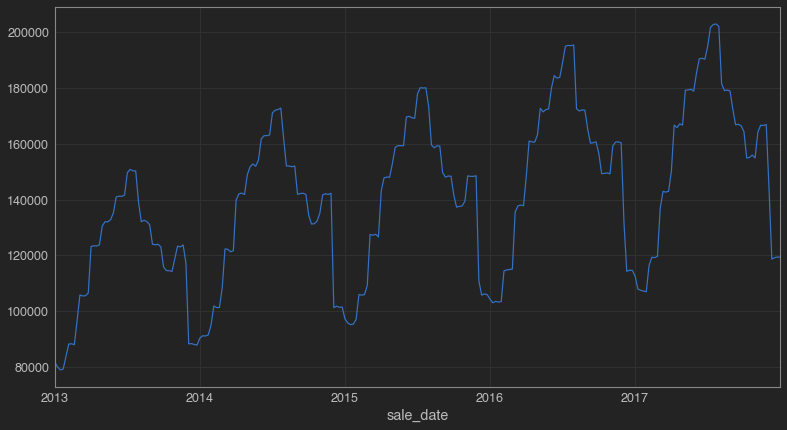

In [126]:
y.resample('W').mean().plot()

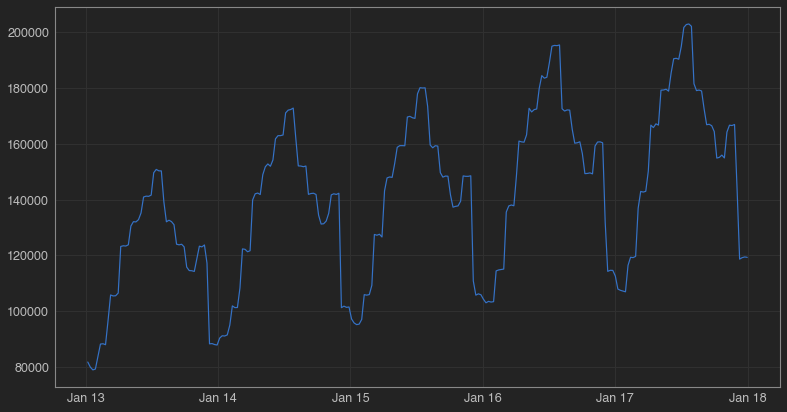

In [127]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

###  Germany

In [128]:
germany = get_germany()
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18,164.81,89.26,272.66,January,2006
2006-01-02,1380.52,164.81,89.26,272.66,January,2006
2006-01-03,1442.53,164.81,89.26,272.66,January,2006
2006-01-04,1457.22,164.81,89.26,272.66,January,2006
2006-01-05,1477.13,164.81,89.26,272.66,January,2006
